In [1]:
import pandas as pd
import requests
import numpy as np
import cn2an

# output_file_name = "data-1-year" 
output_file_name = "data-10-year" 
urls = {
    # 'data-1-year' :"https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/fe810aa29f305b7dce1e6271556bdbf1?q=VTJGc2RHVmtYMTg2Tmo2TDdZUktQcUwyT3p5TEdYRU9HdUJBSFFNQzRhaXJvNlVzYmFQd052dndYR1A0c1lOVE5ZVUxGU2tyRU5WWC9yVnB2U0R1bGg4YlFCdnlhSWNuL3p1SUdjakxUaFJ5Vk1mV2kzSm04QU03V0FISmdzYXVoYUUvaS9pcGY3Q3NMWXpTN0tubzhXc1g4VGY0QmRiN3A5dUthSHhlNlhwQ0VIdStLaFA5aUJvNWkxWjYxaU52cXZ2cjY1aDhheG9FUitxOFdGSzlxQjE0OEdPeTdCTmVHRCswZUhnOElxZ0Z0dGIxVExqSTNMYjBTRVN2VGdacXk0MS9sQnlzaG0vQWo1eXdWNkZrN0Q2b2ViTTZUWmVaZWh3aWNiQzhBUGZCSGpPcWZldG1CVkQxUzRJcXlOdDVQTGd3dlIvWk15TUl0Ym5tUlhmNFVWZ1NtRjY4ZDBxL3VmdnErQnpDaURSRFY5N1ZCSUxRTUFsR2dJWDQxbUFGcHoya2ZOS2ExZmNLa1lzS1FadVRDT21UNHBsTU5jOFkyTm9zRTlwb0d4OTc5T2tVcmZjeFg4M1h3anRRbUx2bmtBUFZuL3FXS1NVN01pZG04dDkvNkdTNWlYRS9NclZ6akVMT3ZZZXBFK1dpRGR6V1Z2ZFlOYmlGamc3QzcwM1ZON3BUWXRkUDAzZzJ3ZTlyUUJsbjgrU1cyK1YrL0tnZTl0YU1tVTBOQlF4QlAzVEVwcHRGcEZ3RnhqaWEwY3I2YjF1WWdaWnJGNjgzZnhUTkRxYlJNQlJsVklIV1FrK3NRWXJYZmRIYVVkbnZUTTBhYmF2SVJ2aVVqOTRFa2FZeXpzcVJLMjMwU0ZlUlI2THdjK2ttSkMxRnNFbG9UVjBTZExDelpMN1NRYmhSZVNWUUFxSTBwdXFZT0w2VXArK1ZMK3kxdEtGSU54eEM2V0NYaW5OTWl3dGVwT1ZPZ3dTemU1VE5xOU5Tc0ZjPQ==",
    # 'data-3-year' :"https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/0e47727c0c7c4fe0046db5d9acfb843a?q=VTJGc2RHVmtYMTllYUc3M213K3d1VzBwVnBoZXNYek5OSFMvekd2TU13NEc2UzRieWtmUTE2NHVXenRiQWVVMTk5cVhmYmhNMjJOZndoTStCNktHZWdBRzNxY3h4b0NYa0QxcTRmbExwc0pMM2trK0VQaExEOHV0Q2l1bmRObnFmcFo5L1hHWFZ0UUpreCszTWRmbUdsWDNvd245WEJ1TG0vdXFPY2hJdzVveDgvSW5FUlBVcmRmSWhrVXNIaGhseWx1dnd5T3ZOWXVHYnhjK2dCWVpYcm1QSklPOVZJMW9SUnQxZVdoSGR2RnFnVWNTN0pJREJPT21ZdUFEZFd4bzIrbWNNZHpySkNGNDZ1dWJ6V0tYVkxXcmNUZzZwTUFBQmpVUEhib2lhMG5MRXlOMzhldEI1MFdkTlNGczhHS2NoQmNlSENkOXFFRHBkKzk5YmNFSmtqVkRrbWVIWUVoU3VJRE40NFhVdm1QWU5mN005VXEvSVlTUUJmR0tDbXdTeGkxbi9KUDk3Um5ETWhBVTNxZitJeUc3YUdGS1grc0Zuc2U3Sy9UNFBqa2hZV0FBM1JJSy9CbExRdXdLS1hHNnVoLzZZV05GTk9jU3NRNjJoN015OW5nOVFzMHIwUFQxVTg1UHFRK1JqVHYyN1Jmd2lDQjJsb2IwRURxNWwvdk1lcXlmMk0vemtWZk9BbnJ6QTNBYjdHR29IMTZPOEI0NTZOTnVqYzBqbGlyTk1lYlByZHEvVk83VGJ1ZGRzMHEvU1lrNFliWWtKbVRycjhtUzZOcDBFcUZiSDJWU1A1c0g4cXp4aG5jdW9YaW5SZmhHWTZvTFlSbWlNbDNQMlVYTUVocjRGV3l0aEc5VDdZZElrMTJPM3lDWDhpUnQyd0hSYTVaS3FISVZBTDJSalRQWDRvT0JlMHZ1VU84THhTSXF3NWtLQW5DSDJRNFdDRmVTMGhTSjI1MGF4VVBDT0tPUEpuUWJNSEFUclE0PQ==",
    # 'data-5-year' :"https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/9875e14de87b7b523ce07d3c9153d924?q=VTJGc2RHVmtYMTlXekYreWFFRTk2WFRIS0Z4aER2YVZyM0ZMWS91N3R5dXlYN0EyQVNqbldoK3BtaktTL3Q3MFV2VTRMUlgrQ1Q2b1lGbjlYblRTK2EzZENUM1hjVTNTQytUUnF6dHZkcHdFWGJRSHpJL0FvNnROd05QS3pYN242UGp3Vjh5TVlnV2Q0aXZkcUh6cmw4eHNGSlNsU0NjcTBiNUZIWE16RHZSMmVNd2NoSm41ZVR4Y2RmTk40Z0kxV3RqenBTZEdCdXNjc2taQXdoQ3pMSDdGTWV2T2JidVVaT1M3WTFwWXQ3d2VLZFZ1NmpYeHU4bGN3alhIU0hqWkVSWi8rcTZNUjNQdEs4ckw2QmRZUWMrQ0kySTBFQkx0UTgwc05UTUlwUThIZ3N2MGttOUppanA0dkpzZzhpbUdIcmt2S2NhTHYyTXpraGtvcnpZM05tMFo1TFZRYmp2ZlV0WWYvUWdLUUJHUXc2K1Y5MnlTNDJ5VHlYaW9sWGY3MUUxRmNEYTJmMFdOL0ZhTHpBb29CVlhRNE0rT2ZBRTg4TGN2bkgyM0duc2xzK0Zrb04zS0lZajg4emFsT1lrdDVRUlZPUVJHMW41T0dkWGFOb0NmNVR5TWtiVzRUbFpYMzFVUGJpRkpKTkNET0o4NVhCemdmaDFNWWZGN01nK3dlOUZHMU1BbFJWcXBTc1A2V3dyWU11cURqYkZ1VFdKaVhNVy9tankxY3lLaC9tZ3FTSkxteXorZnU5QU1KSXdLL1czV0ZvOXQxczN6QzVjL090WUtqWklDRWRZdHJvQ2VsbVFzS0Jhb1VRVUtUa1pLNE9obzlLOGRoREgzbTMrallJVFZGbkVGcitRT2h1dnllaEpYQXB3OVJoNHEwVndQYndVU1RFdmg5aW11eFNpWTliVUJZNHFhTWJaV2NoaXdpZzVFZTlsQzA2Z1RZZHBHTGZFTDVuckN0V2N2dkg0ZFN4ZklkZUJoMlRjPQ==",
    'data-10-year' :"https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/dc49f7b019067380c74fb4732b037dea?q=VTJGc2RHVmtYMStzQTFVTENVdzNnZ3VpMlBPTVp6OTBYUFNiSStKZ2VLbWhNSngvd3NPUWZlTHQ1VytQMnlZMGo2ZzgxVVR1bDFjRjdEcXc0TnNXdTM3c2F1d2lJN2hhUXJzQVYzbzNydnZWdnA5SmZieWpFUllBOVVuVXFBNHNHZURic3NmMnlaVmp1UWszVjhUY1E1VVorbEhCdjVHUmJtZG9qdFZ1NThSL1NySXNib3Y5YlVEN2Q3N3dyTTRGOTNKalZsQm5hcXdmV2xHYWM0eVo1cVgrdWxRSXdQZHJwOWpDbllYbUZGN3NqS0xmZTIvZ0J3c1BFajdHTWQzdkNzWkFFQ2JGSXJDNWRJdW1UVDZLYkd0TXJvK0JEWFlwcHlwWEd5ZWZEajNoY0IrMjFWd3ZzRG9qU1dNS0JENFlXOHhHN3dmbmxBYkdmWUliZ0NNbFFBWFJZcWtXSDBsZEZnL2NzeENwWStlaW9hMnJ3UDFGU0dQcWljeVdGUGI3L1hGVmdVNkpBZVJ0QVdqVG5paVRDQ3cyekx3V1ordGZVR2xRbXQ0VVpaZXoyTGJQZDBlVDI4UzhjSm9oV2N4YWxrM0ZnaGFyMFkyMzlQeDJqVzZxTzdyelAyTG1oTklIVVBZanJMcE10ZGZRNTd4cDZORDJVWldrdzNtdW1yRERYMTM3S2tpU1VTWVVjKzR3akRGSTFJMC84YkI1NFpwWGxOTWZJRllhOTJaUlFGK3RJQ1hyeTYrZU9ldVVDWE0wVTJVWUZKRHk1N20zU2xKR3hRVVp3MG1qSFk1RG9pQzY5VDc3N3dNOC9PRlZmMVFZcm04eGQ1NjZuZmYvWnpzZnRkOXQ5Qkhjbno2djV2TW10UjRucld4YW5wRHRaVlB1SmdCWUNUS0tmZkxMYk44WXZYVnZvNFkxTTh3bXk4b3hscEVRY3JtU0lOYjFEYnZ2WFhFVHNWR3FVYjRiOE03bmZzYzZNZldqRUxVPQ=="
}

Extract certain features

In [2]:
columns = ["lon", "lat", "g", "s", "b", "pu", "f", "v", "el", "m", "l", "e", "tp"]
new_columns = {
    "lon": "longitude",
    "lat": "latitude",
    "g": "house_age",
    "s": "area",
    "b": "property_type",
    "pu": "purpose",
    "f": "floor",
    "v": "layout",
    "el": "elevator",
    "m": "janitor",
    "l": "parking_space",
    "e": "closing_year",
    "tp": "price",
}

print("Start")

res = requests.get(urls[output_file_name])
data = res.json()

df = pd.DataFrame(data)
df.to_csv(f'{output_file_name}-raw.csv', index=False, encoding="utf_8_sig")

print("Finish")

Start


KeyboardInterrupt: 

In [ ]:
df = df[columns]
df = df.replace('', np.nan)
df = df.rename(columns=new_columns)
df[:5]

,longitude,latitude,house_age,area,property_type,purpose,floor,layout,elevator,janitor,parking_space,closing_year,price
0,120.975388,24.815008,44,32.39,透天厝,住商用,全/二層,3房2廳2衛,無,無,0,112/10/02,"8,000,000"
1,120.979137,24.816959,29,18.59,住宅大樓(11層含以上有電梯),住家用,四層/十四層,1房1廳1衛,有,有,0,112/10/03,"4,000,000"
2,121.016387,24.784438,14,46.26,住宅大樓(11層含以上有電梯),辦公用,八層/十五層,3房2廳2衛,有,有,1,112/10/01,"24,800,000"
3,120.977307,24.820037,32,26.41,華廈(10層含以下有電梯),住家用,三層/五層,3房2廳2衛,有,無,1,112/10/03,"9,250,000"
4,120.968306,24.776166,19,15.26,華廈(10層含以下有電梯),住家用,地下三層/四層,1房1廳1衛,有,有,0,112/10/02,"4,150,000"


Handle the missing values

In [ ]:
# print out the column which contains missing values 
missing_columns = []
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')
    if missing_count > 0:
        missing_columns.append(column_name)

longitude: 0
latitude: 0
house_age: 21151
area: 0
property_type: 1
purpose: 65
floor: 8
layout: 2274
elevator: 39981
janitor: 0
parking_space: 0
closing_year: 0
price: 0


In [ ]:
for column_name in missing_columns:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')

house_age: 0
property_type: 0
purpose: 0
floor: 0
layout: 0
elevator: 0


Remove ',' in `area`

In [ ]:
df['area'] = df['area'].str.replace(',', '').astype(float)

Layout processing

In [ ]:
df[['bedroom', 'living_room', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df[['bedroom', 'living_room', 'bathroom']] = df[['bedroom', 'living_room', 'bathroom']].fillna(0).astype(int)
df = df.drop(columns=['layout'])

In [ ]:
df[['bedroom', 'living_room', 'bathroom']]

,bedroom,living_room,bathroom
0,3,2,2
1,1,1,1
2,3,2,2
3,3,2,2
4,1,1,1
...,...,...,...
65516,3,2,2
65517,4,2,2
65518,4,2,2
65519,4,2,2


`Elevator`, `Janitor` and `purpose` processing (Label Encoding)

In [ ]:
binary_mapping = {"有": 1, "無": 0}
df["elevator"] = df["elevator"].map(binary_mapping)
df["janitor"] = df["janitor"].map(binary_mapping)

df["residential"] = df["purpose"].map(lambda val : 1 if val == '住家用' else 0)
df = df.drop(columns=['purpose'])

In [ ]:
df[['elevator', 'janitor', 'residential']]

,elevator,janitor,residential
0,0,0,0
1,1,1,1
2,1,1,0
3,1,0,1
4,1,1,1
...,...,...,...
65516,1,1,1
65517,1,1,1
65518,1,1,1
65519,1,1,1


`Property Type` processing (One Hot Encoding)

In [ ]:
property_type_mapping = {
    '住宅大樓(11層含以上有電梯)': 'residential_building',
    '公寓(5樓含以下無電梯)': 'apartment',
    '華廈(10層含以下有電梯)': 'mansion',
    '透天厝': 'detached_house'
}

df['property_type'] = df['property_type'].map(property_type_mapping)
df = pd.get_dummies(df, columns=['property_type'])

In [ ]:
df[['property_type_residential_building', 'property_type_apartment', 'property_type_mansion', 'property_type_detached_house']]

,property_type_residential_building,property_type_apartment,property_type_mansion,property_type_detached_house
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
65516,1,0,0,0
65517,1,0,0,0
65518,1,0,0,0
65519,1,0,0,0


`Floor` processing 

In [ ]:
# Split floor to sale_floor and total_floor
df[['sale_floor', 'total_floor']] = df['floor'].str.split('/', expand=True)
df = df.drop(['floor'], axis=1)

In [ ]:
# Convert Chinese to Arabic number in total_floor column
df['total_floor'] = df['total_floor'].replace('層','', regex=True)
df = df.drop(df[df['total_floor'] == '--'].index)    # Remove the row if the total_floor value is '--'
df['total_floor'] = df['total_floor'].apply(lambda x: cn2an.cn2an(x))


In [ ]:
# After splitting floor, total_floor or sale_floor might be empty  
df = df.replace('', np.nan)
for column_name in ['total_floor', 'sale_floor']:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

In [ ]:
# Split sale_floor into sale_floor, sale_floor_basement, sale_floor_all, sale_floor_other 
def sale_floor_mapping(value):
    keywords = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
    if any(keyword in value for keyword in keywords):
        return 'other'
    elif '地下' in value:
        return 'basement'
    elif '全' in value:
        return 'all'
    
    else:
        # Convert Chinese to Arabic number in sale_floor column
        value = value.replace('層', '')
        return value

# for sale_floor_count
def sale_floor_cnt(series):
    if '全' in series['sale_floor']:
        return series['total_floor']
    else:
        return series['sale_floor'].count('層') - series['sale_floor'].count('夾層')
    
    
### 以下求優化

others = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
lowerFloor = ['一層', '二層', '三層', '四層', '五層']
middleFloor = ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
higherFloor_n = others + lowerFloor + middleFloor + ['全', '地下']

df['sale_floor_all'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['sale_floor_basement'] = df['sale_floor'].map(lambda x: 1 if '地下' in x else 0)
df['sale_floor_other'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x for keyword in others) else 0)

df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in lowerFloor) else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in middleFloor) else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if any(floor for floor in x.split(',') if floor not in higherFloor_n) else 0)

# if '全' set lower_floor, middle_floor, and higher_floor to 1
df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)

# count the number of floor being sold 
df['sale_floor_count'] = df.apply(sale_floor_cnt, axis=1)

# drop sale_floor column
df = df.drop(['sale_floor'], axis=1)

In [ ]:
df[['sale_floor_all', 'sale_floor_basement', 'sale_floor_other', 'lower_floor', 'middle_floor', 'higher_floor', 'sale_floor_count','total_floor']]

,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor
0,1,0,0,1,1,1,2,2
1,0,0,0,0,0,0,1,14
2,0,0,0,0,0,0,1,15
3,0,0,0,0,0,0,1,5
4,0,1,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...
65516,0,0,0,0,0,0,1,24
65517,0,0,0,0,0,0,1,24
65518,0,0,0,0,0,0,1,24
65519,0,0,0,0,0,0,1,28


`Closing year` processing

In [ ]:
df['closing_year'] = df['closing_year'].str.split('/', expand=True)[0]

In [ ]:
df['closing_year']

0        112
1        112
2        112
3        112
4        112
        ... 
65516    102
65517    102
65518    102
65519    102
65520    102
Name: closing_year, Length: 65496, dtype: object

Move `sale_floor` and `total_floor` backward

In [ ]:
# df = pd.concat([df.drop('sale_floor', axis=1), df['sale_floor']], axis=1)
df = pd.concat([df.drop('total_floor', axis=1), df['total_floor']], axis=1)

`Price` processing 

In [ ]:
# Price string to int
df['price'] = df['price'].replace(',','', regex=True).map(int)
# move price back
df = pd.concat([df.drop('price', axis=1), df['price']], axis=1)
# drop (不知道哪個 RZ 在上面登記 0 元的房子)
df.drop(df[(df['price'] == 0)].index, inplace=True)

In [ ]:
df['price']

0         8000000
1         4000000
2        24800000
3         9250000
4         4150000
           ...   
65516    15320000
65517    17550000
65518    17280000
65519    17480000
65520    31450000
Name: price, Length: 65495, dtype: int64

Output the file

In [ ]:
rec_df = df
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,property_type_residential_building,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,price
0,120.975388,24.815008,44,32.39,0,0,0,112,3,2,...,0,1,0,0,1,1,1,2,2,8000000
1,120.979137,24.816959,29,18.59,1,1,0,112,1,1,...,1,0,0,0,0,0,0,1,14,4000000
2,121.016387,24.784438,14,46.26,1,1,1,112,3,2,...,1,0,0,0,0,0,0,1,15,24800000
3,120.977307,24.820037,32,26.41,1,0,1,112,3,2,...,0,0,0,0,0,0,0,1,5,9250000
4,120.968306,24.776166,19,15.26,1,1,0,112,1,1,...,0,0,1,0,0,0,0,1,4,4150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65490,121.009386,24.792447,3,59.25,1,1,1,102,3,2,...,1,0,0,0,0,0,0,1,24,15320000
65491,121.009386,24.792447,3,73.21,1,1,2,102,4,2,...,1,0,0,0,0,0,0,1,24,17550000
65492,121.009386,24.792447,3,71.28,1,1,2,102,4,2,...,1,0,0,0,0,0,0,1,24,17280000
65493,121.012768,24.789179,2,73.34,1,1,2,102,4,2,...,1,0,0,0,0,0,0,1,28,17480000


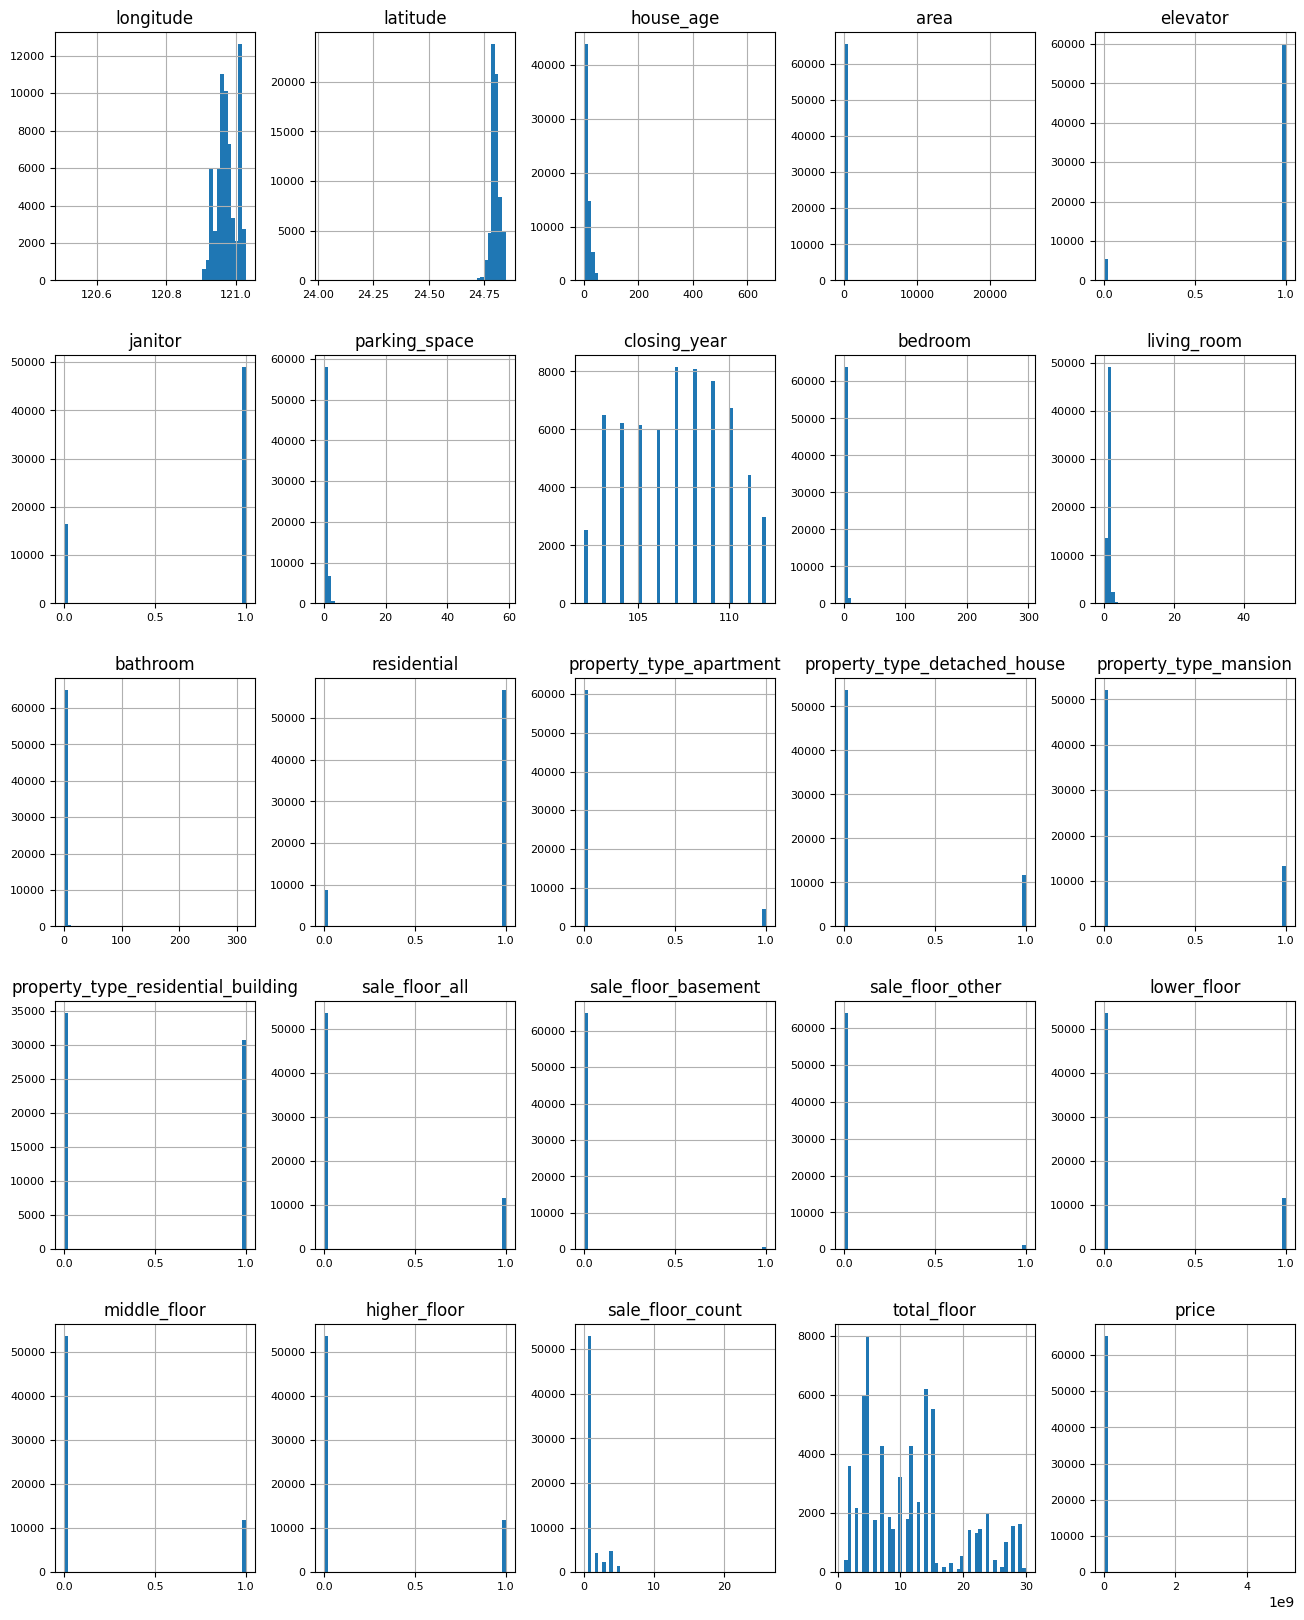

In [ ]:
df = rec_df.copy()
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [3]:
df = pd.read_csv('data-10-year.csv')

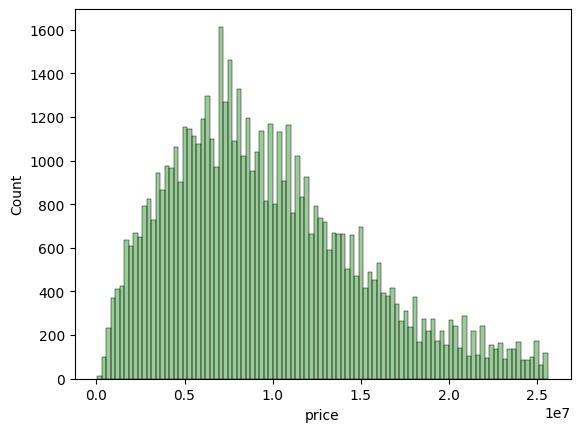

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 去掉 price 離群值
s = df['price'].describe()
IQR = s['75%'] - s['25%']
upper_bound = s['75%'] + IQR*1.5
lower_bound = s['25%'] - IQR*1.5
df = df[df['price'] < upper_bound]
df = df[df['price'] > lower_bound]

sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

In [6]:
df.to_csv(f'{output_file_name}.csv', index=False, encoding="utf_8_sig")
df['closing_year'] = df['closing_year'].astype(int)
for i in range(1, 11):
    filter_df = df[(df['closing_year'] > (112 - i))]
    filter_df.to_csv(f'data-{i}-year.csv', index=False, encoding="utf_8_sig")

In [7]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['longitude', 'latitude', 'house_age','area', 'parking_space', 'bedroom', 'living_room', 'bathroom', 'sale_floor_count', 'total_floor']

# 使用MinMaxScaler進行MinMax 歸一化
min_max_scaler = MinMaxScaler()
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])
df[columns_to_normalize]

,longitude,latitude,house_age,area,parking_space,bedroom,living_room,bathroom,sale_floor_count,total_floor
0,0.897660,0.960355,0.064565,0.062333,0.00,0.09375,0.095238,0.019048,0.250,0.034483
1,0.904816,0.962738,0.042042,0.035775,0.00,0.03125,0.047619,0.009524,0.125,0.448276
2,0.975917,0.923021,0.019520,0.089025,0.05,0.09375,0.095238,0.019048,0.125,0.482759
3,0.901322,0.966497,0.046547,0.050825,0.05,0.09375,0.095238,0.019048,0.125,0.137931
4,0.884141,0.912918,0.027027,0.029367,0.00,0.03125,0.047619,0.009524,0.125,0.103448
...,...,...,...,...,...,...,...,...,...,...
62965,0.969009,0.928811,0.001502,0.159691,0.10,0.12500,0.095238,0.019048,0.125,0.931034
62966,0.969009,0.928811,0.001502,0.158979,0.10,0.12500,0.095238,0.019048,0.125,0.931034
62967,0.969009,0.928811,0.001502,0.158979,0.10,0.12500,0.095238,0.019048,0.125,0.931034
62968,0.969009,0.928811,0.001502,0.158979,0.10,0.12500,0.095238,0.019048,0.125,0.931034


In [8]:
df.to_csv(f'{output_file_name}-normalized.csv', index=False, encoding="utf_8_sig")

In [9]:
df = pd.read_csv('data-10-year-normalized.csv')
df['closing_year'] = df['closing_year'].astype(int)
for i in range(1, 11):
    filter_df = df[(df['closing_year'] > (112 - i))]
    filter_df.to_csv(f'data-{i}-year-normalized.csv', index=False, encoding="utf_8_sig")